In [ ]:
pip install contextily

In [1]:
import contextily as ctx

/env/lib/python3.6/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


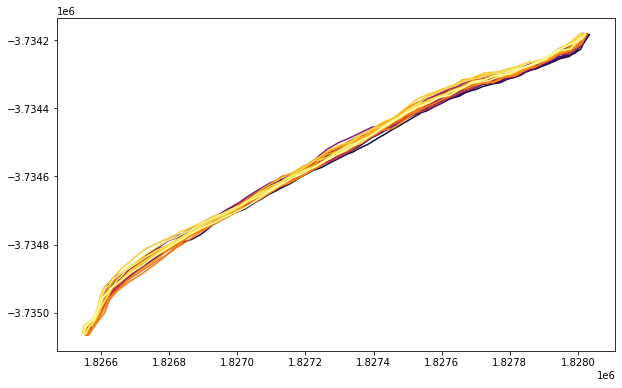

In [14]:
import geopandas as gpd
from shapely.geometry import box
import pandas as pd
import matplotlib

# Get bounding box of data
ymax, xmin = -32.94020, 151.75523
ymin, xmax = -32.95006, 151.77255

# Set up WFS requests for annual coastlines & rates of change statistics
deacl_coastlines_wfs = 'https://geoserver.dea.ga.gov.au/geoserver/wfs?' \
                       'service=WFS&version=1.1.0&request=GetFeature&' \
                       'typeName=dea:coastlines&maxFeatures=1000&' \
                      f'bbox={ymin},{xmin},{ymax},{xmax},urn:ogc:def:crs:EPSG:4326'

# Load data from WFS and set CRS
deacl_gdf = gpd.read_file(deacl_coastlines_wfs)
deacl_gdf.crs = 'EPSG:3577'

# Clip to extent of satellite data
bbox = gpd.GeoDataFrame(geometry=gpd.GeoSeries(box(xmin, ymin, xmax, ymax)),
                        crs='EPSG:4326')  
deacl_gdf = gpd.overlay(deacl_gdf, bbox.to_crs(deacl_gdf.crs))
deacl_gdf = deacl_gdf.dissolve('year')

deacl_gdf.plot(cmap='inferno', figsize=(10, 10))

/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

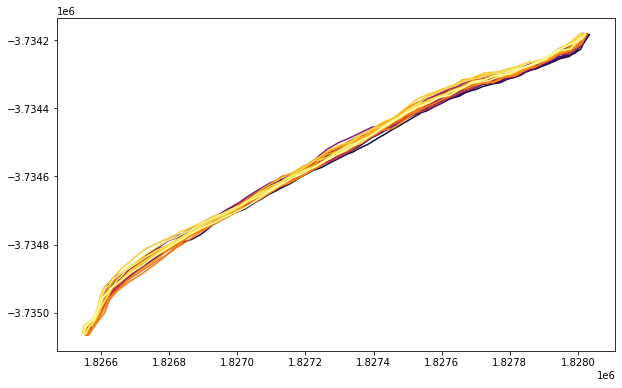

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
deacl_gdf.plot(ax=ax, cmap='inferno', figsize=(10, 10))
ctx.add_basemap(ax, source='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}')

In [21]:
ctx.providers.Esri

SyntaxError: invalid syntax (<ipython-input-21-5e353fc73cc4>, line 1)

In [22]:
from ipyleaflet import basemaps, basemap_to_tiles

# Plot interactive map to select area
basemaps.Esri.WorldImagery

{'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
 'max_zoom': 20,
 'attribution': 'Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community',
 'name': 'Esri.WorldImagery'}